## ONE HOT ENCODING USING ONE HOT ENCODER 

In [106]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [107]:
# Load dataset (from UCI or Kaggle link)

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [110]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Age'>

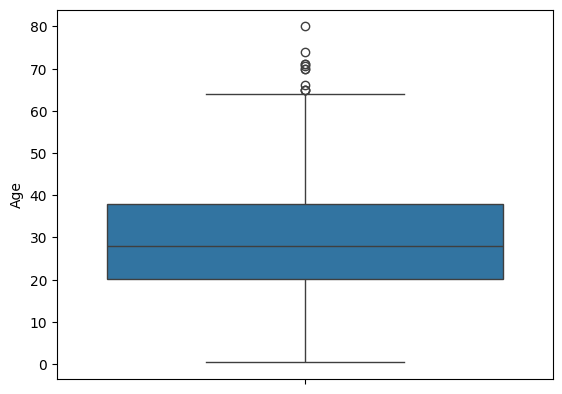

In [111]:
import seaborn as sns
sns.boxplot(df['Age'])

<Axes: ylabel='Cabin'>

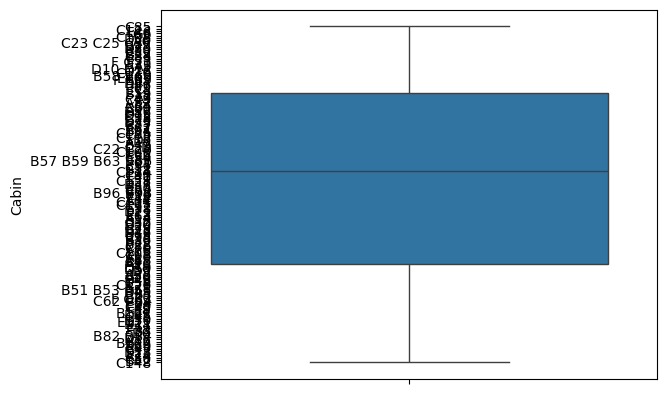

In [112]:
sns.boxplot(df['Cabin'])

In [113]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [114]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [116]:
df[df.duplicated]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [117]:
df = df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [118]:
X = df.drop(columns = ['Survived'],axis = 1)  
y = df['Survived']

In [119]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [121]:
X_train.shape

(712, 7)

In [122]:
y_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [123]:
# one hot encoder instance
ohe = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False)

#fit and transform 'Embarked'
encoded_cols = ohe.fit_transform(X_train[['Embarked']])
encoded_df = pd.DataFrame(encoded_cols,columns = ohe.get_feature_names_out(['Embarked'])) 
encoded_df                                

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
707,0.0,0.0,1.0
708,0.0,0.0,1.0
709,0.0,0.0,1.0
710,0.0,0.0,1.0


In [124]:
X_train_encoded = pd.concat([X_train.reset_index(drop=True),encoded_df],axis = 1)

# drop original embarked col
X_train_encoded.drop('Embarked',axis = 1,inplace = True)

print('OneHotEncoder sample\n')
X_train_encoded.head(20)

OneHotEncoder sample



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,male,45.5,0,0,28.5000,0.0,0.0,1.0
1,2,male,23.0,0,0,13.0000,0.0,0.0,1.0
2,3,male,32.0,0,0,7.9250,0.0,0.0,1.0
3,3,male,26.0,1,0,7.8542,0.0,0.0,1.0
4,3,female,6.0,4,2,31.2750,0.0,0.0,1.0
5,1,male,24.0,0,1,247.5208,1.0,0.0,0.0
6,1,male,45.0,0,0,26.5500,0.0,0.0,1.0
7,2,male,29.0,1,0,27.7208,1.0,0.0,0.0
8,3,male,28.0,0,0,7.8958,0.0,0.0,1.0
9,1,male,28.0,0,0,35.5000,0.0,0.0,1.0


## Label Encoding

In [125]:
X1 = df.drop(columns = ['Survived'],axis = 1)
y1 = df['Survived']
X1.shape

(891, 7)

In [126]:
# selected sex col
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 42)
X1_train.shape

(712, 7)

In [127]:
y1_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [128]:
le = LabelEncoder()

#fit n transform sex col
X1_train['Sex_encoded'] = le.fit_transform(X1_train['Sex'])
X1_train[['Sex','Sex_encoded']].head()

,Sex,Sex_encoded
331,male,1
733,male,1
382,male,1
704,male,1
813,female,0


## Ordinal Encoding

In [129]:
X2 = df.drop(columns = ['Survived'],axis = 1)
y2 = df['Survived']
X2.shape

(891, 7)

In [130]:
# selected sex col
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 42)
X2_train.shape

(712, 7)

In [131]:
y2_train.value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [132]:
from sklearn.preprocessing import OrdinalEncoder

In [139]:
categories_order = [['Q','S','C']]
oe = OrdinalEncoder(categories = categories_order,handle_unknown = 'error')
X_train['Embarked_encoded'] = oe.fit_transform(X_train[['Embarked']])

print("Ordinal")
X_train[['Embarked','Embarked_encoded']].head(60)

Ordinal


,Embarked,Embarked_encoded
331,S,1.0
733,S,1.0
382,S,1.0
704,S,1.0
813,S,1.0
118,C,2.0
536,S,1.0
361,C,2.0
29,S,1.0
55,S,1.0


## Target Encoding

In [ ]:
#preferred in x-categorical cols
#applied when no.of categories is huge,cardinality is high
#values are replaced in each category corresponding to target variable data

In [ ]:
#just for practice

In [140]:
X = df.drop(columns = ['Survived'],axis = 1)
y = df['Survived']
X.shape

(891, 7)

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape

(712, 7)

In [142]:
X_train['Survived'] = y_train

In [145]:
# mean of target for each category in sex
mean_encoded_sex = X_train.groupby('Sex')['Survived'].mean()

#map  mean valyes
X_train['Sex_Encoded_target'] = X_train['Sex'].map(mean_encoded_sex)

print("target dataframe:")
X_train[['Sex','Survived','Sex_Encoded_target']].head(20)

target dataframe:


,Sex,Survived,Sex_Encoded_target
331,male,0,0.186296
733,male,0,0.186296
382,male,0,0.186296
704,male,0,0.186296
813,female,0,0.738776
118,male,0,0.186296
536,male,0,0.186296
361,male,0,0.186296
29,male,0,0.186296
55,male,1,0.186296


In [ ]:
## Cross Validation